In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import layers, models
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
# (x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
dim = x_train[0].size

In [4]:
x_train = x_train.reshape((x_train.shape[0], dim)).astype("float32") / 255
x_test = x_test.reshape((x_test.shape[0], dim)).astype("float32") / 255

In [5]:
y_train = y_train.flatten()
y_test = y_test.flatten()

In [6]:
model = models.Sequential([
    layers.Dense(256, activation='relu',  input_shape=(dim,)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')

])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.compile(
    optimizer=keras.optimizers.SGD(learning_rate=0.01),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [8]:
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)


Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5068 - loss: 1.7906 - val_accuracy: 0.8572 - val_loss: 0.6485
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8522 - loss: 0.6012 - val_accuracy: 0.8892 - val_loss: 0.4164
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8833 - loss: 0.4293 - val_accuracy: 0.9025 - val_loss: 0.3521
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8954 - loss: 0.3718 - val_accuracy: 0.9121 - val_loss: 0.3174
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9059 - loss: 0.3337 - val_accuracy: 0.9168 - val_loss: 0.2965
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9126 - loss: 0.3129 - val_accuracy: 0.9218 - val_loss: 0.2798
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9172 - loss: 0.2867 - val_accuracy: 0.9249 - val_loss: 0.2667
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9214 - loss: 0.2796 - val_accuracy: 0.

In [9]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy: {test_acc:.4f}, Test Loss: {test_loss:.4f}")


313/313 - 0s - 1ms/step - accuracy: 0.9321 - loss: 0.2381
Test Accuracy: 0.9321, Test Loss: 0.2381


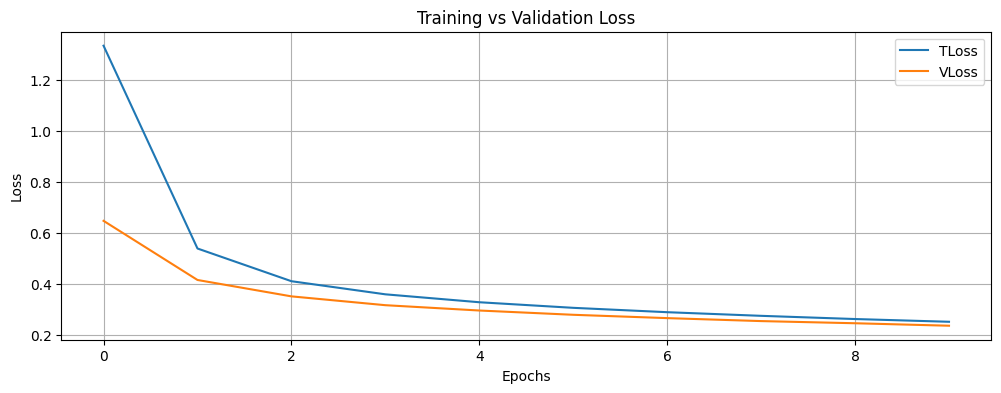

In [10]:
plt.figure(figsize=(12,4))
# df = pd.DataFrame(history.history)
# sns.lineplot(data=df[['loss', 'val_loss']])
plt.plot(history.history["loss"], label="TLoss")
plt.plot(history.history["val_loss"], label="VLoss")
plt.xlabel("Epochs")          # X-axis label
plt.ylabel("Loss")            # Y-axis label
plt.title("Training vs Validation Loss")
plt.legend()
plt.grid(True)
plt.show()

In [11]:
# sns.lineplot(data=df[['accuracy', 'val_accuracy']])

NameError: name 'df' is not defined